In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset into the tool.

In [6]:
df = pd.read_csv('penguins_size.csv')


In [7]:
new_columns = ['species','island','culmen-length','culmen-depth','flipper-length','body-mass','sex']
df.columns = new_columns
print(new_columns)

['species', 'island', 'culmen-length', 'culmen-depth', 'flipper-length', 'body-mass', 'sex']


##Univariate Analysis

Text(0.5, 1.0, 'Culmen Depth Histogram')

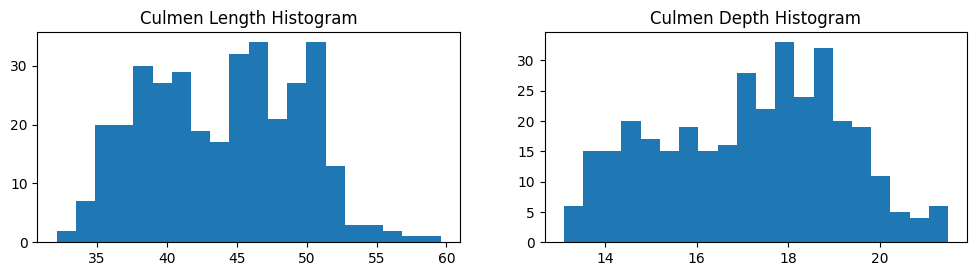

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['culmen-length'].dropna(), bins=20)
plt.title('Culmen Length Histogram')

plt.subplot(2, 2, 2)
plt.hist(df['culmen-depth'].dropna(), bins=20)
plt.title('Culmen Depth Histogram')

Text(0.5, 1.0, 'Island Distribution')

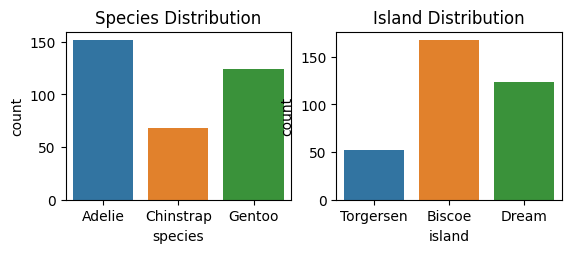

In [9]:
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='species')
plt.title('Species Distribution')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='island')
plt.title('Island Distribution')

##Bi Variate Analysis

Text(0.5, 1.0, 'Body Mass vs. Island')

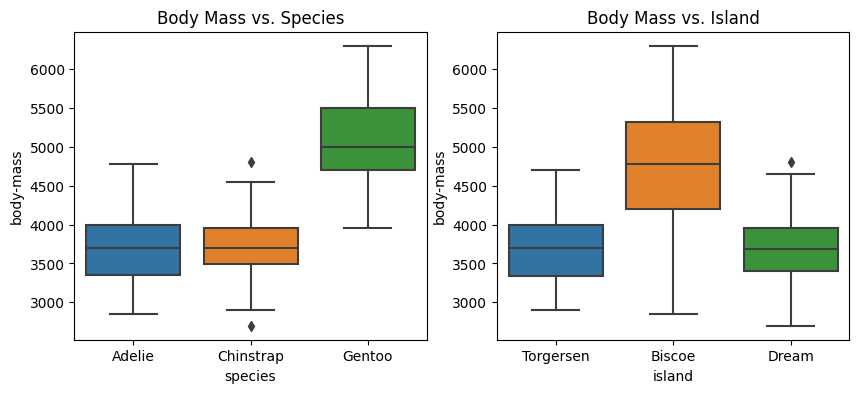

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='species', y='body-mass')
plt.title('Body Mass vs. Species')


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='island', y='body-mass')
plt.title('Body Mass vs. Island')

##Multi variate Analysis

<ipython-input-12-3ed9e85095e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

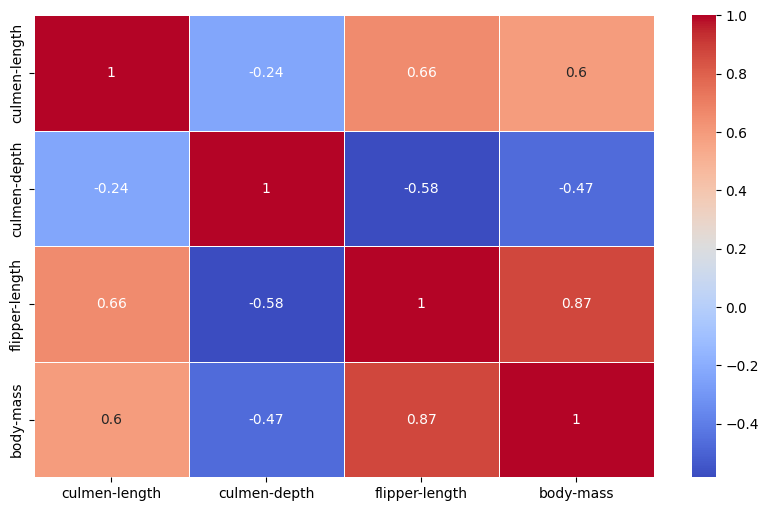

In [12]:
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

##Descriptive Statistics

In [13]:
df.describe()

,culmen-length,culmen-depth,flipper-length,body-mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##Check for Missing values and deal with them

In [14]:
missing_val = df.isnull().sum()
print(missing_val)

species            0
island             0
culmen-length      2
culmen-depth       2
flipper-length     2
body-mass          2
sex               10
dtype: int64


## Find the outliers and replace them outliers


In [16]:
from sklearn.ensemble import IsolationForest
df = df.dropna()
print(df)
## removing rows with missing values

numerical_columns = ['culmen-length', 'culmen-depth', 'flipper-length', 'body-mass']
##only numerical data is needed
numerical_data = df[numerical_columns]
##Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
## Fiting the model
iso_forest.fit(numerical_data)
##Predicting outliers
outlier = iso_forest.predict(numerical_data)
##Adding an 'outlier' column to data
df['outlier'] = outlier
##Display the rows identified as outliers
outliers_data = df[df['outlier'] == -1]
print(outliers_data)

    species     island  culmen-length  culmen-depth  flipper-length  \
0    Adelie  Torgersen           39.1          18.7           181.0   
1    Adelie  Torgersen           39.5          17.4           186.0   
2    Adelie  Torgersen           40.3          18.0           195.0   
4    Adelie  Torgersen           36.7          19.3           193.0   
5    Adelie  Torgersen           39.3          20.6           190.0   
..      ...        ...            ...           ...             ...   
338  Gentoo     Biscoe           47.2          13.7           214.0   
340  Gentoo     Biscoe           46.8          14.3           215.0   
341  Gentoo     Biscoe           50.4          15.7           222.0   
342  Gentoo     Biscoe           45.2          14.8           212.0   
343  Gentoo     Biscoe           49.9          16.1           213.0   

     body-mass     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
## Removing rows with outliers
df = df[df['outlier'] != -1]
df

,species,island,culmen-length,culmen-depth,flipper-length,body-mass,sex,outlier
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1


In [18]:
from sklearn.model_selection import train_test_split
targetvariable = 'species'
independentvariables = df.columns.difference([targetvariable])
x_train, x_test, y_train, y_test = train_test_split(df[independentvariables], df[targetvariable], test_size=0.2, random_state=42)